## Data Exploration 

**Objective:** Load data from competition using time series from walmart. 
**Dataset:** The M5 Walmart dataset comes from the Kaggle competition “M5 Forecasting – Accuracy”, which focuses on hierarchical time-series forecasting in a large-scale retail setting. The data represent daily unit sales for Walmart products across the United States over several years, enriched with calendar events and pricing information.

The dataset is designed to reflect real-world forecasting challenges, including:
	•	thousands of related time series
	•	multiple aggregation levels
	•	promotions and holidays
	•	non-stationary demand patterns
	•	strong cross-sectional heterogeneity

**Dataset Objective:** The objective of the competition is to forecast the next 28 days of sales for all item–store combinations while ensuring coherent predictions across hierarchical levels, evaluated using the Weighted Root Mean Squared Scaled Error (WRMSSE) metric.

In [23]:
# Import Libraries
import pandas as pd
import zipfile
import os
from sklearn.model_selection import train_test_split

# Define file paths
data_dir = '../data/'
zip_file_path = os.path.join(data_dir, 'raw', 'm5-forecasting-accuracy.zip')
extracted_dir = os.path.join(data_dir, 'raw', 'dataset')
preprocessed_dir = os.path.join(data_dir, 'proc')
os.makedirs(extracted_dir, exist_ok=True)
os.makedirs(preprocessed_dir, exist_ok=True)

# Function to unzip files
def zipextract(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)        

# Unzip dataset
zipextract(zip_file_path, extracted_dir)

In [63]:
# Open csv files with pandas
sales = pd.read_csv(os.path.join(extracted_dir, 'sales_train_evaluation.csv'))
calendar = pd.read_csv(os.path.join(extracted_dir, 'calendar.csv'))
prices = pd.read_csv(os.path.join(extracted_dir, 'sell_prices.csv'))


In [25]:
# Check Shape, first rows, nulls and datatypes
print("Sales Data Shape:", sales.shape)
print(sales.head())
print("Nulls in Sales Data:\n", sales.isnull().sum())
print("Sales Data Types:\n", sales.dtypes)

Sales Data Shape: (30490, 1947)
                              id        item_id  ... d_1940 d_1941
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  ...      0      1
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  ...      0      0
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  ...      0      1
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  ...      2      6
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  ...      1      0

[5 rows x 1947 columns]
Nulls in Sales Data:
 id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
           ..
d_1937      0
d_1938      0
d_1939      0
d_1940      0
d_1941      0
Length: 1947, dtype: int64
Sales Data Types:
 id          object
item_id     object
dept_id     object
cat_id      object
store_id    object
             ...  
d_1937       int64
d_1938       int64
d_1939       int64
d_1940       int64
d_1941       int64
Length: 1947, dtype: object


In [26]:
# Calendar Check Shape, first rows, nulls and datatypes
print("Calendar Data Shape:", calendar.shape)
print(calendar.head())
print("Nulls in calendar Data:\n", calendar.isnull().sum())
print("Calendar Data Types:\n", calendar.dtypes)

Calendar Data Shape: (1969, 14)
         date  wm_yr_wk    weekday  ...  snap_CA  snap_TX  snap_WI
0  2011-01-29     11101   Saturday  ...        0        0        0
1  2011-01-30     11101     Sunday  ...        0        0        0
2  2011-01-31     11101     Monday  ...        0        0        0
3  2011-02-01     11101    Tuesday  ...        1        1        0
4  2011-02-02     11101  Wednesday  ...        1        0        1

[5 rows x 14 columns]
Nulls in calendar Data:
 date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64
Calendar Data Types:
 date            object
wm_yr_wk         int64
weekday         object
wday             int64
month            int64
year             int64
d               object
event_name_1    object
event

# Pre-analysis: Missing Values, Outliers, Visualizations

Analysis of the type of data and potential information to be removed

In [ ]:
# Handle missing values if any (example)
# print(sales.isnull().any().any()) # False
# print(prices.isnull().any().any()) # False
# print(calendar.isnull().any().any()) # True

missing_event_name = calendar[calendar['event_name_1'].isnull()]
#print(f"Rows with missing event_name_1: {len(missing_event_name)}")
#missing_event_name.head(10)

missing_event_type = calendar[calendar['event_type_1'].isnull()]
#missing_event_type.head(10)

calendar[['event_name_1', 'event_type_1']].isnull().sum()
calendar[calendar['event_type_1'].notna()]
calendar0 = calendar

# Fill in with No Event
calendar['event_name_1'].fillna('No Event', inplace = True)
calendar['event_type_1'].fillna('No Event', inplace = True)
calendar['event_name_2'].fillna('No Event', inplace = True)
calendar['event_type_2'].fillna('No Event', inplace = True)


/var/folders/n9/7h_0tmx15jj1srfspnp75fvw0000gn/T/ipykernel_52363/4072562356.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  calendar['event_name_1'].fillna('No Event', inplace = True)
/var/folders/n9/7h_0tmx15jj1srfspnp75fvw0000gn/T/ipykernel_52363/4072562356.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

### Missing Values

Four Variables with Missing values event_name_1, event_name_2, event_type_1, event_type_2. Each of these represent a specific date event for which a date in the calendar can show up to two events. But since most of the dates do not have any events from a holiday perspective most are empty. For these is better to keep a consistent date such as 'No Event', this is because these missing can't be replaced with arbitrary values from other holidays as these are not extrapolable. 


# Outliers

Check for values that are anomalous. 


⚠️ SUSPICIOUS: FOODS_3_180_CA_1_evaluation has 282 outliers (14.5%)
⚠️ SUSPICIOUS: FOODS_3_409_CA_3_evaluation has 232 outliers (12.0%)
⚠️ SUSPICIOUS: FOODS_1_097_CA_2_evaluation has 254 outliers (13.1%)
⚠️ SUSPICIOUS: HOBBIES_1_272_TX_2_evaluation has 98 outliers (5.0%)
⚠️ SUSPICIOUS: HOUSEHOLD_1_064_CA_4_evaluation has 171 outliers (8.8%)


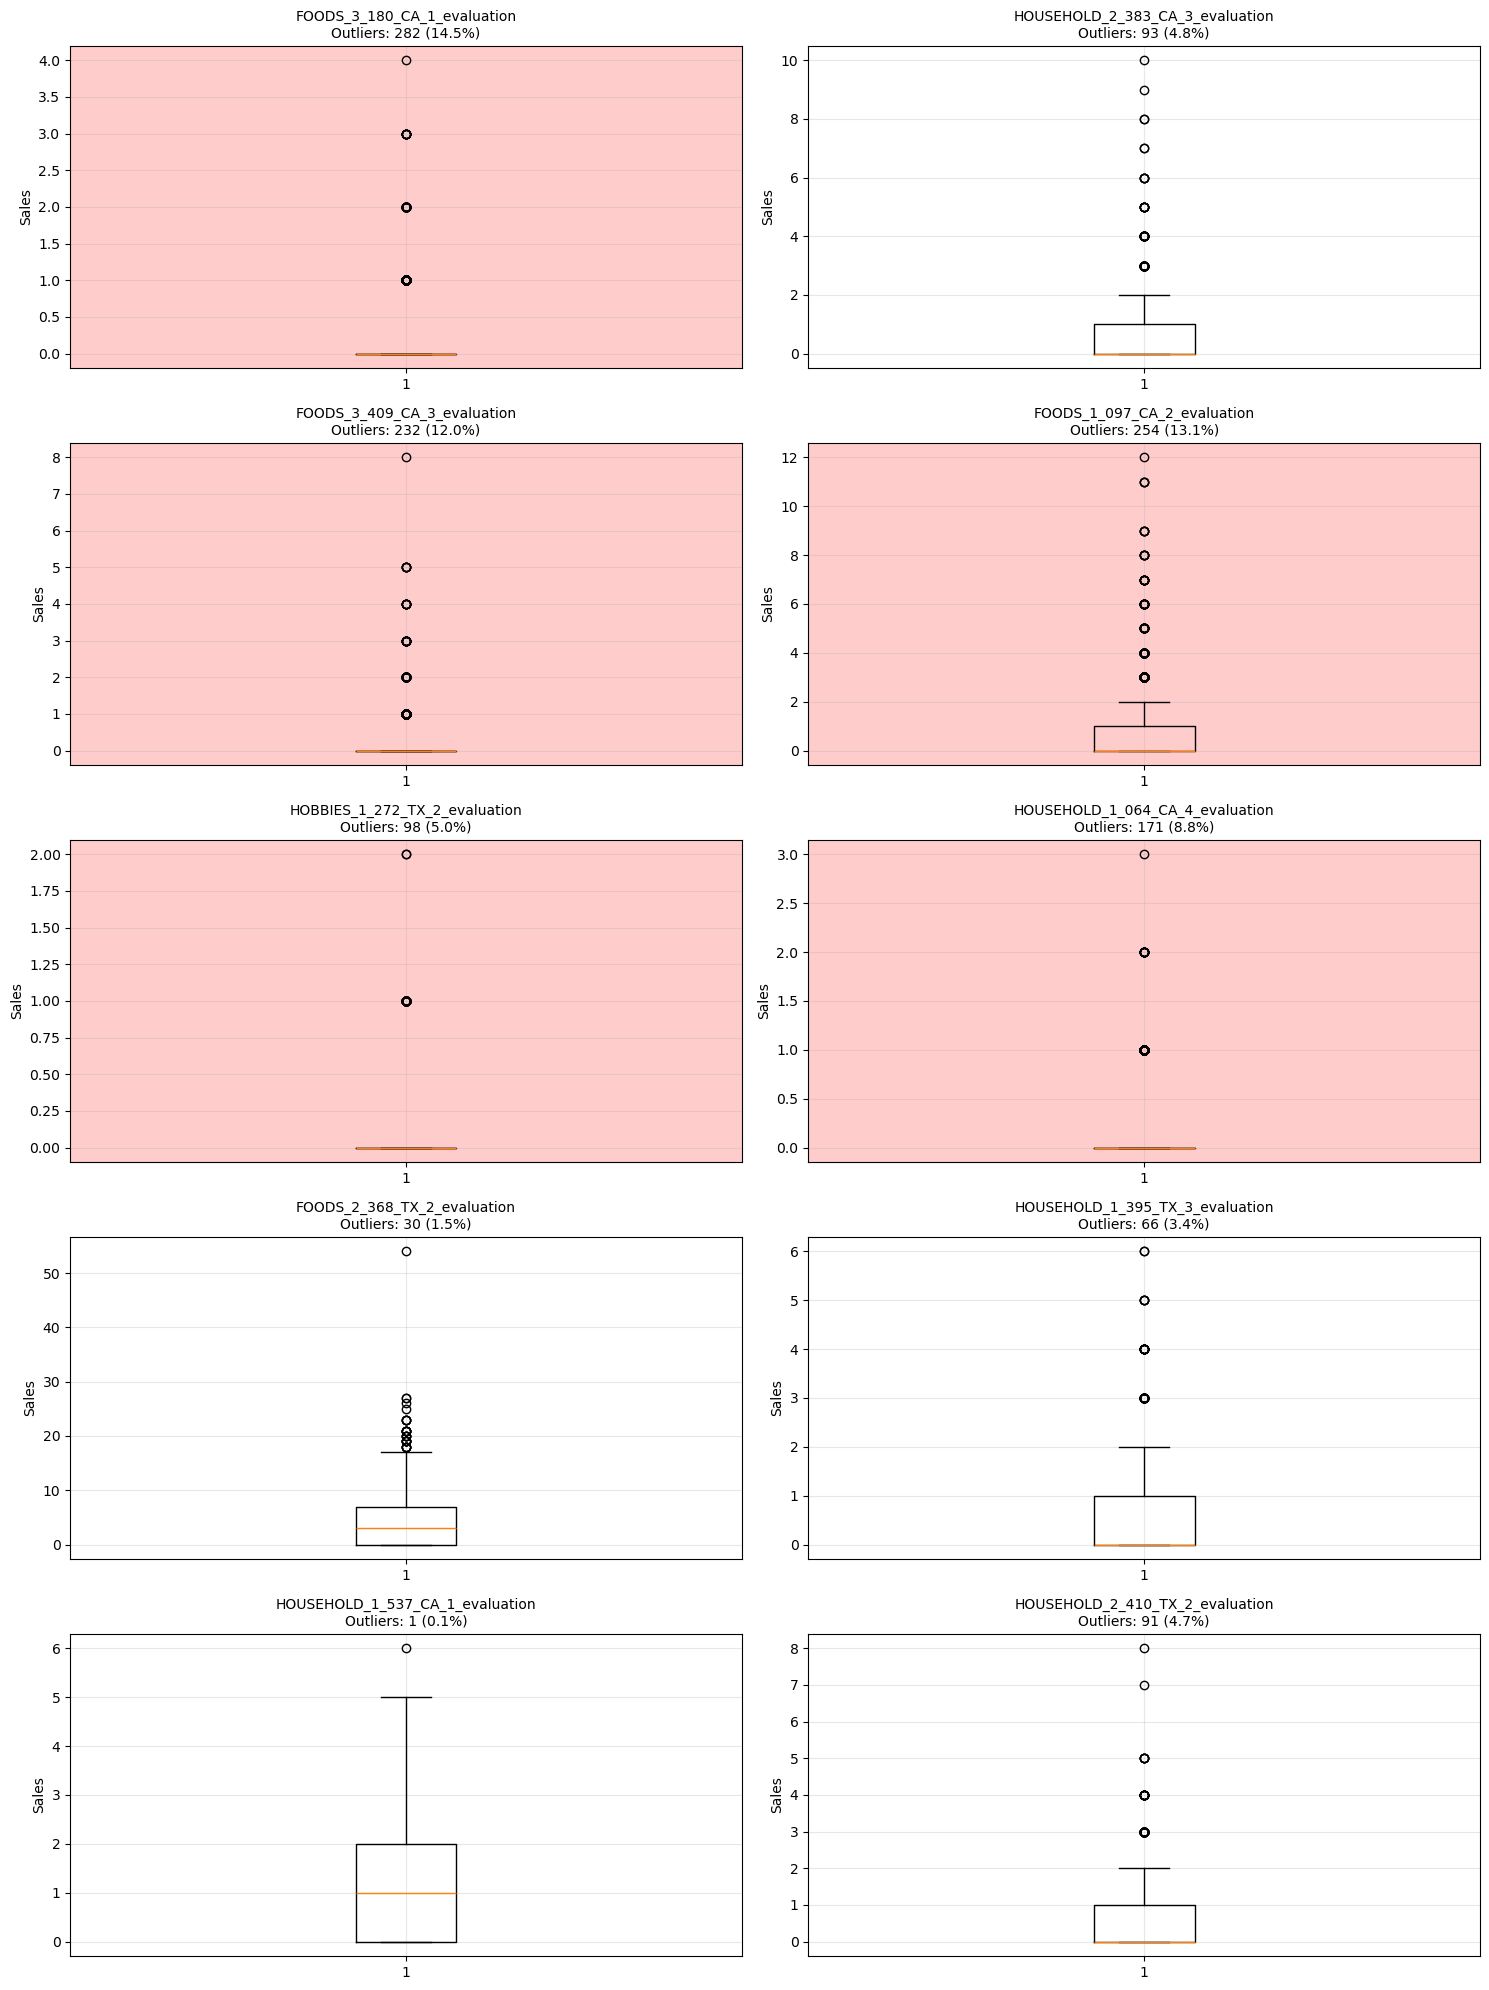

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Select 10 random products to analyze
sample_products = sales['id'].sample(10, random_state=42).tolist()

# Get sales columns (d_1 to d_1941)
sales_cols = [col for col in sales.columns if col.startswith('d_')]

# Create figure with subplots
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()

# For each sample product, create boxplot and identify outliers
for idx, product_id in enumerate(sample_products):
    # Get sales data for this product
    product_sales = sales[sales['id'] == product_id][sales_cols].values.flatten()
    
    # Calculate IQR and outliers
    Q1 = np.percentile(product_sales, 25)
    Q3 = np.percentile(product_sales, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = product_sales[(product_sales < lower_bound) | (product_sales > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(product_sales)) * 100
    
    # Create boxplot
    axes[idx].boxplot(product_sales, vert=True)
    axes[idx].set_title(f'{product_id}\nOutliers: {outlier_count} ({outlier_pct:.1f}%)', fontsize=10)
    axes[idx].set_ylabel('Sales')
    axes[idx].grid(True, alpha=0.3)
    
    # Flag suspicious products (e.g., >5% outliers)
    if outlier_pct > 5:
        axes[idx].set_facecolor('#ffcccc')  # Light red background
        print(f"⚠️ SUSPICIOUS: {product_id} has {outlier_count} outliers ({outlier_pct:.1f}%)")

plt.tight_layout()
plt.show()

# Time Series Plots

Create time series plots for products of different patterns (stable, seasonal, trending)

In [ ]:
# First, let's test with a small sample of products and time periods
# Sample only first 100 days to test the code quickly
sample_days = 100
sales_cols = [col for col in sales.columns if col.startswith('d_')][:sample_days]

# Select 3 random products to start
test_products = sales['id'].sample(3, random_state=123).tolist()

# Create test plot
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

for idx, product_id in enumerate(test_products):
    # Get sales data for this product
    product_sales = sales[sales['id'] == product_id][sales_cols].values.flatten()
    
    # Plot time series
    axes[idx].plot(range(len(product_sales)), product_sales, linewidth=1.5)
    axes[idx].set_title(f'Product: {product_id}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Days')
    axes[idx].set_ylabel('Sales')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Tested with {len(test_products)} products and {sample_days} days")
print(f"Test products: {test_products}")